In [112]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from testCases_v2 import *
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1)

ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

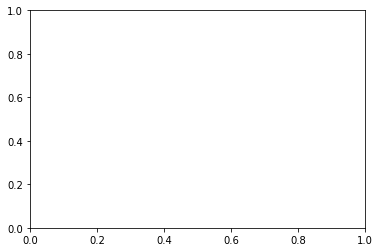

In [114]:
# 导入数据集
X, Y = load_planar_dataset()

plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);

shape_X = X.shape
shape_Y = Y.shape
m = X.shape[1]
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

In [7]:
# 构建网络模型
# 定义网络结构
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

In [8]:
# 初始化模型参数
def initialize_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    params = {"W1": W1, "b1": b1,
             "W2": W2, "b2": b2}
    
    return params

In [9]:
# 正向传播
def forward_prop(params, X):
    Z1 = np.dot(params["W1"], X) + params["b1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(params["W2"], A1) + params["b2"]
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1, "A1": A1, 
            "Z2": Z2, "A2": A2}
    
    return A2, cache

In [10]:
# 代价函数
def cost_fun(A2, Y):
    m = Y.shape[1]
    cost = (-1/m) * np.sum(Y*np.log(A2) + (1-Y)*np.log(1-A2))
    cost = np.squeeze(cost)
    
    return cost

In [11]:
# 反向传播
def backward_prop(params, cache, X, Y):
    m = X.shape[1]
    dZ2 = cache["A2"] - Y
    dW2 = (1/m) * np.dot(dZ2, cache["A1"].T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(params["W2"].T, dZ2) * (1 - np.power(cache["A1"], 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1, "db1": db1, 
            "dW2": dW2, "db2": db2}
    
    return grads

In [31]:
# 模型函数
def nn_model(X, Y, n_h, num_itera, learning_rate = 1.2, print_cost = False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    params = initialize_params(n_x, n_h, n_y)
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    costs = []
    
    for i in range(num_itera):
        A2, cache = forward_prop(params, X)
        
        cost = cost_fun(A2, Y)
        
        grads = backward_prop(params, cache, X, Y)
        
        W1 -= learning_rate * grads["dW1"]
        b1 -= learning_rate * grads["db1"]
        W2 -= learning_rate * grads["dW2"]
        b2 -= learning_rate * grads["db2"]
        
        params = {"W1": W1, "b1": b1, 
                  "W2": W2, "b2": b2}
        
        if print_cost and (i % 1000 == 0):
            costs.append(cost)
            print("Cost after iteration %i: %f" % (i, cost))
        
    return params

In [32]:
# 预测函数
def predict(params, X):
    
    A2, cache = forward_prop(params, X)
    pred = (A2 > 0.5)
    
    assert(pred.shape == (1, X.shape[1]))
    
    return pred

Cost after iteration 0: 0.693082
Cost after iteration 1000: 0.272784
Cost after iteration 2000: 0.212757
Cost after iteration 3000: 0.194818
Cost after iteration 4000: 0.186806
Cost after iteration 5000: 0.181931
Cost after iteration 6000: 0.178446
Cost after iteration 7000: 0.175816
Cost after iteration 8000: 0.173780
Cost after iteration 9000: 0.172174


ValueError: c of shape (1, 400) not acceptable as a color sequence for x with size 400, y with size 400

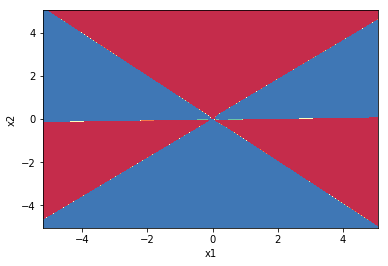

In [96]:
# Build a model with a n_h-dimensional hidden layer
params = nn_model(X, Y, n_h = 5, num_itera = 10000, learning_rate = 1.0, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [92]:
# Print accuracy
pred = predict(params, X)
print ('Accuracy: %f' % (np.mean(pred == Y) * 100) + '%')

Accuracy: 91.750000%


In [122]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
# plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

# Build a model with a n_h-dimensional hidden layer
params = nn_model(X, Y, n_h = 5, num_itera = 10000, learning_rate = 0.99, print_cost=True)

# Plot the decision boundary
# plot_decision_boundary(lambda x: predict(params, x.T), X, Y)
# plt.title("Decision Boundary for hidden layer size " + str(4))

# Print accuracy
pred = predict(params, X)
print ('Accuracy: %f' % (np.mean(pred == Y) * 100) + '%')

Cost after iteration 0: 0.693122
Cost after iteration 1000: 0.092139
Cost after iteration 2000: 0.061034
Cost after iteration 3000: 0.042213
Cost after iteration 4000: 0.032820
Cost after iteration 5000: 0.027834
Cost after iteration 6000: 0.024666
Cost after iteration 7000: 0.022390
Cost after iteration 8000: 0.020629
Cost after iteration 9000: nan


/home/dyjng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/home/dyjng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


Accuracy: 100.000000%
